In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [6]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [7]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<Axes: xlabel='label'>

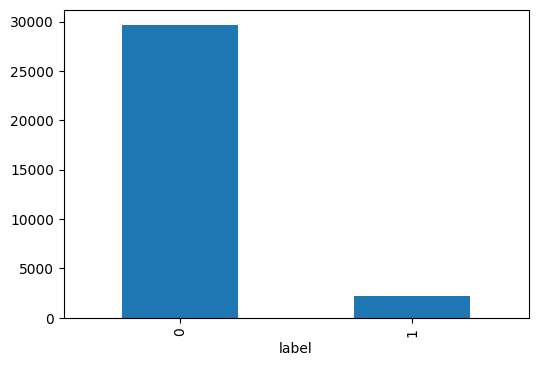

In [8]:
train['label'].value_counts().plot.bar(figsize = (6, 4))

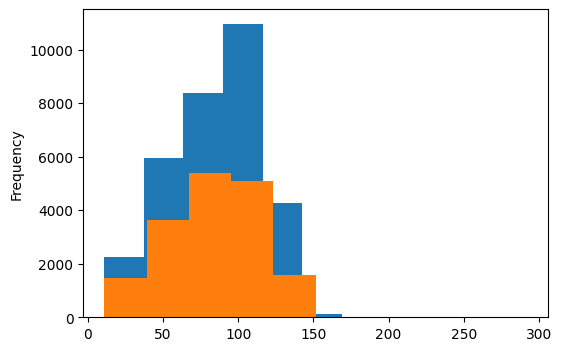

In [9]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(figsize = (6, 4))

In [10]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [11]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

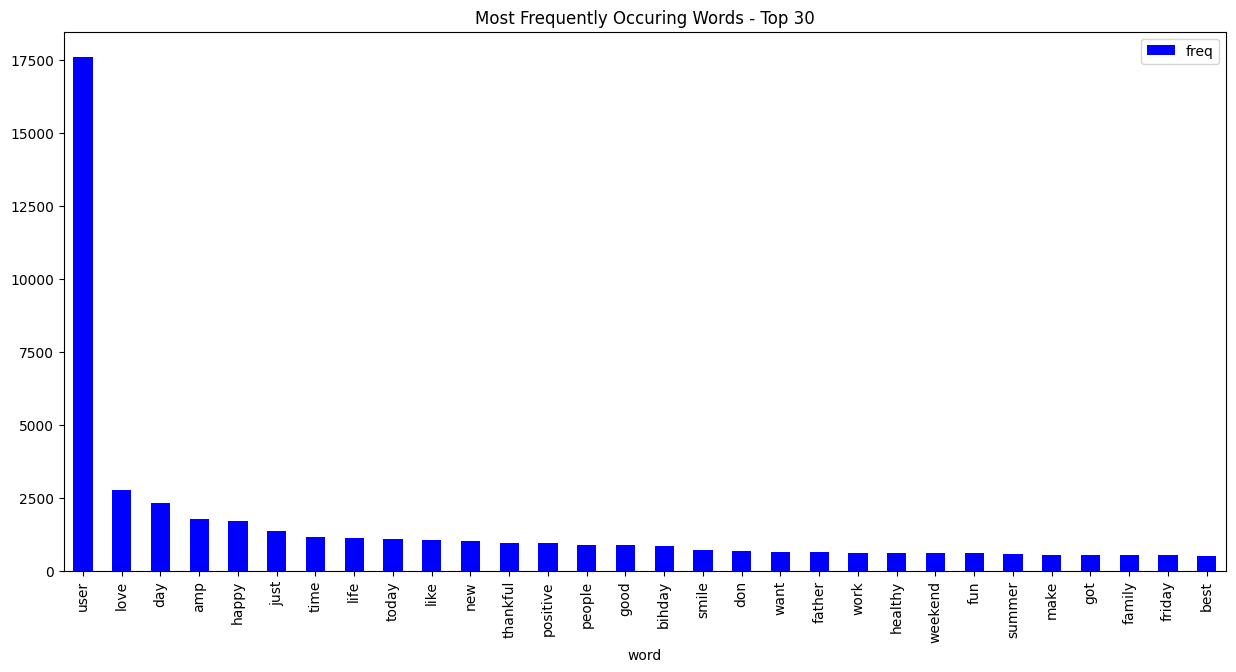

In [12]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

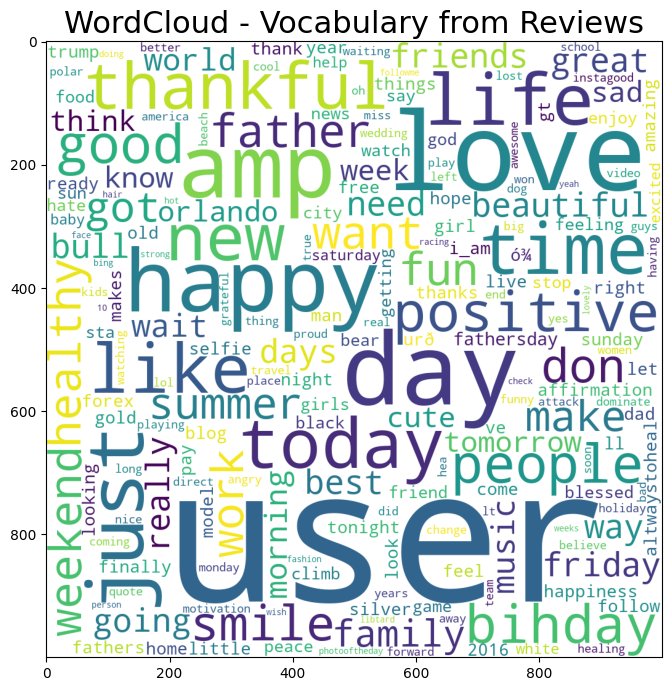

In [13]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

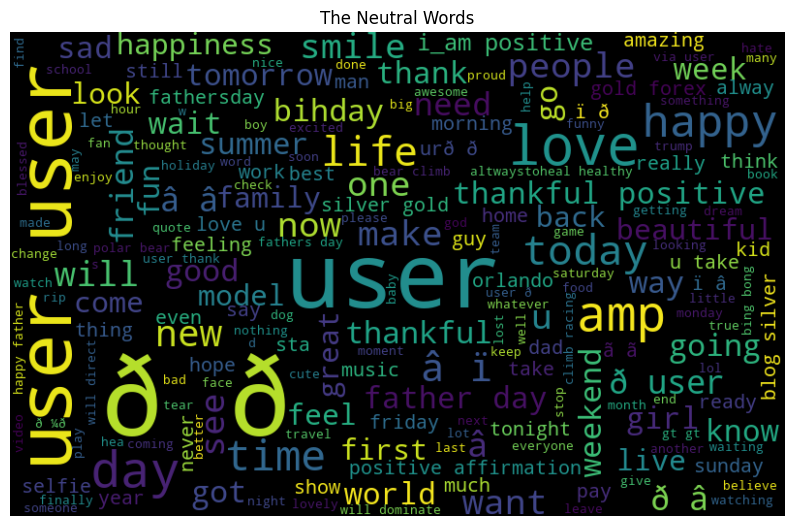

In [14]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


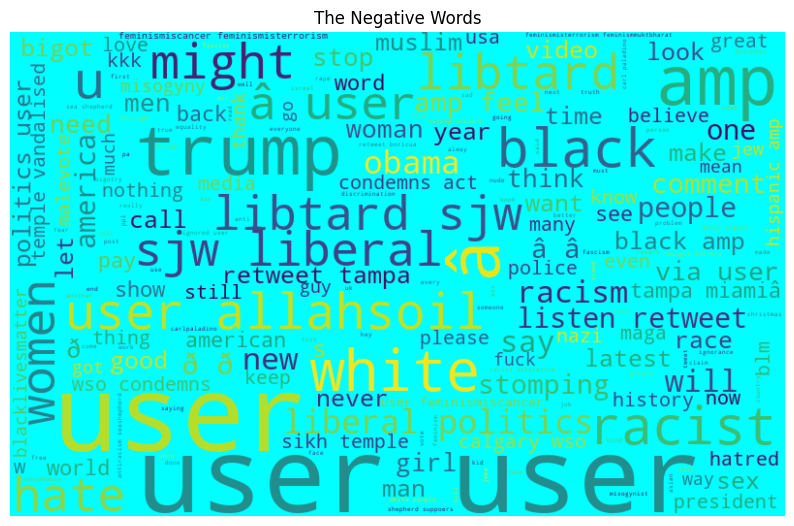

In [15]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [16]:
# collecting the hashtags
import re

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [17]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

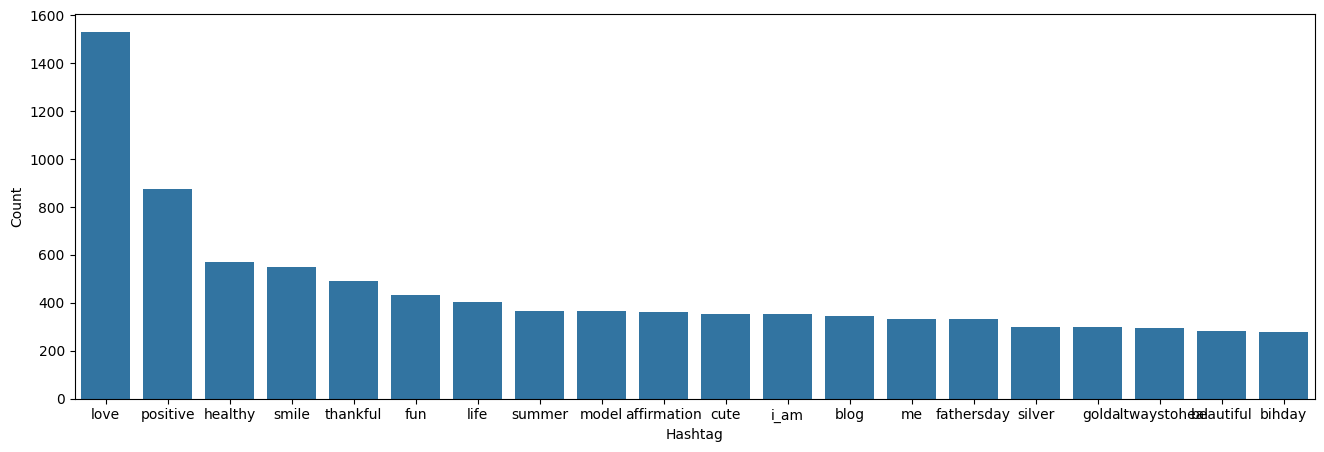

In [18]:
import nltk

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

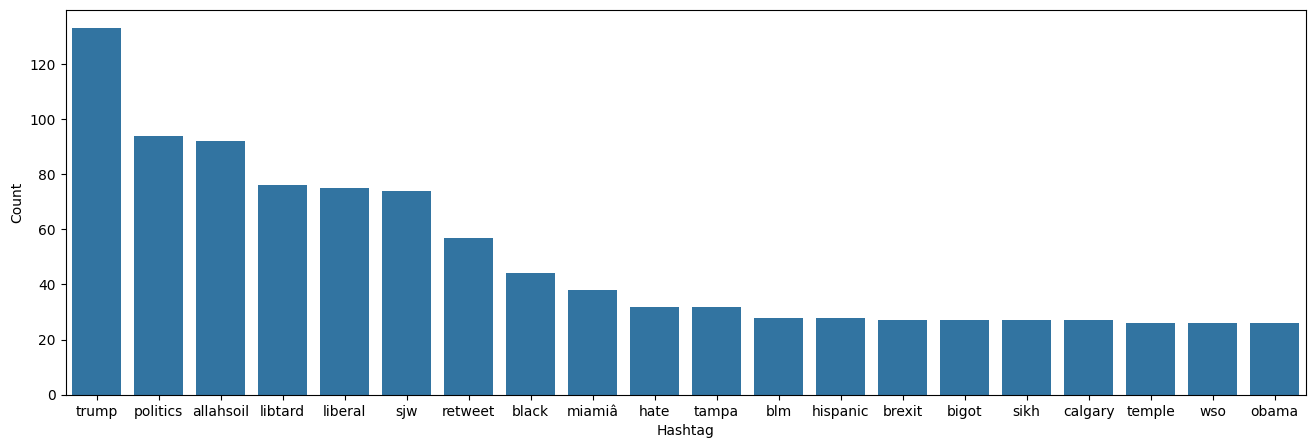

In [19]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [20]:
import gensim
import nltk
nltk.download('punkt')  # Download the tokenizer models
from nltk.tokenize import word_tokenize

# Assuming 'train['tweet']' contains your tweet data
tokenized_tweet = train['tweet'].apply(lambda x: word_tokenize(x.lower()))  # Tokenizing and converting to lowercase


# Creating a word2vec model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200,  # Change 'size' to 'vector_size'
            window=5,  # Context window size
            min_count=2,
            sg=1,  # 1 for skip-gram model
            hs=0,
            negative=10,  # For negative sampling
            workers=2,  # Number of CPU cores
            seed=34)

# Training the model
model_w2v.train(tokenized_tweet, total_examples=len(train['tweet']), epochs=20)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\henil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(7343805, 11519140)

In [21]:
model_w2v.wv.most_similar(positive = "dinner")

[('lamb', 0.5564125776290894),
 ('shawarma', 0.5452938675880432),
 ('enroute', 0.5197402834892273),
 ('loading', 0.5170222520828247),
 ('bayshore', 0.51377272605896),
 ('spaghetti', 0.5111130475997925),
 ('foodblogger', 0.5086835622787476),
 ('breakfasting', 0.5080755352973938),
 ('lastnight', 0.5076339840888977),
 ('foodâ\x80¦', 0.5066812038421631)]

In [22]:
model_w2v.wv.most_similar(positive = "cancer")

[('wounded', 0.5946277379989624),
 ('oâ\x80¦', 0.5579140186309814),
 ('worldâ\x80\x99s', 0.5556789040565491),
 ('surviving', 0.5526295304298401),
 ('guncontrolplease', 0.5407143831253052),
 ('misery', 0.5381236672401428),
 ('diabetes', 0.5329541563987732),
 ('yearly', 0.5313440561294556),
 ('selfs', 0.529349148273468),
 ('buyers', 0.5272007584571838)]

In [23]:
model_w2v.wv.most_similar(positive = "apple")

[('wwdc', 0.5378518104553223),
 ('siri', 0.5285428166389465),
 ('applekeynote', 0.5263265371322632),
 ('imessage', 0.5253918170928955),
 ('macos', 0.5191882252693176),
 ('techie', 0.5133056640625),
 ('wwdc2016', 0.5088564157485962),
 ('crowdfunding', 0.5071221590042114),
 ('kickstaercampaign', 0.5026949644088745),
 ('downloading', 0.49859923124313354)]

In [24]:
model_w2v.wv.most_similar(negative = "hate")

[('ð\x9f\x98\x84', 0.054711755365133286),
 ('chips', 0.049080219119787216),
 ('ð\x9f\x98\x8d', 0.04497392475605011),
 ('local', 0.043318476527929306),
 ('foodie', 0.04277614876627922),
 ('steak', 0.034301385283470154),
 ('followed', 0.01893032155930996),
 ('gopro', 0.018623849377036095),
 ('yum', 0.015254881232976913),
 ('awesome', 0.00988184753805399)]

In [25]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

# Use TaggedDocument instead of LabeledSentence
from gensim.models.doc2vec import TaggedDocument

# Example usage:
tagged_data = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(tokenized_tweet)]


In [26]:
from gensim.models.doc2vec import TaggedDocument

# Function to label the tokenized tweets
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))  # Use TaggedDocument instead of LabeledSentence
    return output

# Label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]  # Display the first 6 labeled tweets


[TaggedDocument(words=['@', 'user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '.', '#', 'run'], tags=['tweet_0']),
 TaggedDocument(words=['@', 'user', '@', 'user', 'thanks', 'for', '#', 'lyft', 'credit', 'i', 'ca', "n't", 'use', 'cause', 'they', 'do', "n't", 'offer', 'wheelchair', 'vans', 'in', 'pdx', '.', '#', 'disapointed', '#', 'getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#', 'model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±', '!', '!', '!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide', ':', 'society', 'now', '#', 'motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[', '2/2', ']', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave', '.', 'chaos'

In [27]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [29]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [30]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [31]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


In [32]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [33]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)



Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9520710799649605
F1 score : 0.6119554204660588
[[7306  126]
 [ 257  302]]


In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9848984189228651
Validation Accuracy : 0.943186084344888
f1 score : 0.598939929328622
[[7198  234]
 [ 220  339]]


In [36]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.933299962457765
f1 score : 0.545609548167093
[[7138  294]
 [ 239  320]]


In [37]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.978181969880272
Validation Accuracy : 0.9521962207483419
f1 score : 0.49868766404199477
[[7419   13]
 [ 369  190]]


In [40]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9608693838388053
Validation Accuracy : 0.9550744587661119
f1 score : 0.5751479289940828
[[7389   43]
 [ 316  243]]
